# Import 

In [81]:
import PyPDF2
import spacy
from spacy import displacy
import re
from textblob import TextBlob
import nltk
from nltk import pos_tag, RegexpParser
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer


# Download NLTK data for POS tagging
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gmctp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gmctp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Extracting the File From the PDF

In [82]:
import fitz  # PyMuPDF
import spacy
from spacy import displacy

def extract_text_from_pdf(pdf_path):
    text = ""
    with fitz.open(pdf_path) as pdf_document:
        num_pages = pdf_document.page_count

        for page_num in range(num_pages):
            page = pdf_document[page_num]
            # Extract text from the page
            page_text = page.get_text()
            
            # Append the text from each page to the result
            text += page_text

    return text

# Replace 'ADH.pdf' with the actual path to your PDF file
pdf_text = extract_text_from_pdf('ADH.pdf')

# Using SpaCy to sort the words into entities

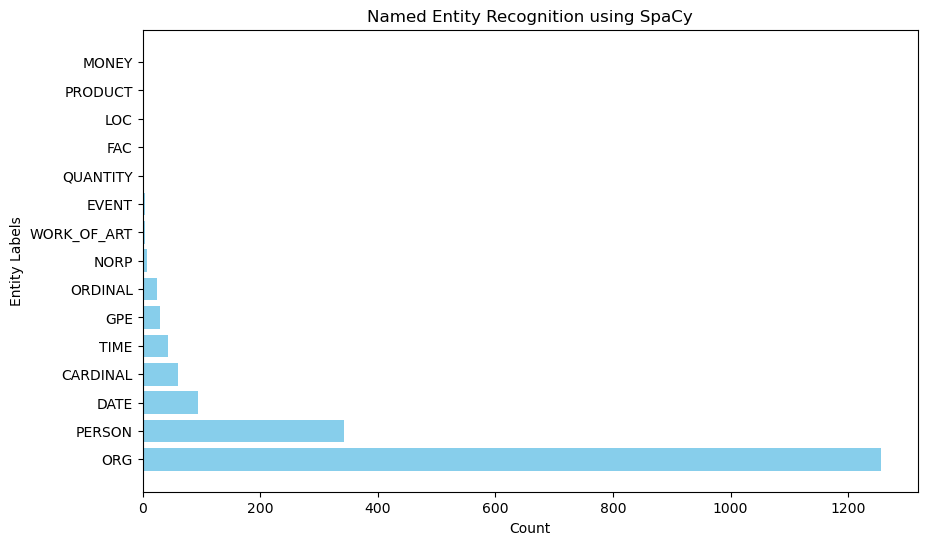

In [83]:
# Replace 'your_pdf_file.pdf' with the actual path to your PDF file
pdf_text = extract_text_from_pdf('ADH.pdf')

# NLP using SpaCy (Named Entity Recognition)
nlp = spacy.load("en_core_web_sm")
doc = nlp(pdf_text)

# Extracting entities and their labels
entities = [(ent.text, ent.label_) for ent in doc.ents]

# Counting the occurrences of each entity label
label_counts = {}
for _, label in entities:
    label_counts[label] = label_counts.get(label, 0) + 1

# Sorting the labels based on their counts
sorted_labels = sorted(label_counts.items(), key=lambda x: x[1], reverse=True)

# Extracting labels and counts for plotting
labels, counts = zip(*sorted_labels)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(labels, counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Entity Labels')
plt.title('Named Entity Recognition using SpaCy')
plt.show()

In [84]:

# NLP using SpaCy (Named Entity Recognition)
nlp = spacy.load("en_core_web_sm")

# Customize named entity recognition to ignore specific words
ignore_entities = ["NORA", "LINDE", "HELMER"]

for word in ignore_entities:
    nlp.vocab[word].is_stop = True

# Process the text with the customized SpaCy pipeline
doc = nlp(pdf_text)

# Display named entities with displacy
displacy.render(doc, style="ent", jupyter=True)

# Using Textblob's sentiment analysis and graphing it

In [85]:
# Sentiment analysis using TextBlob
blob = TextBlob(pdf_text)

# Get sentiment polarity (-1 to 1, where -1 is negative, 0 is neutral, and 1 is positive)
polarity = blob.sentiment.polarity

# Get sentiment subjectivity (0 to 1, where 0 is very objective and 1 is very subjective)
subjectivity = blob.sentiment.subjectivity

# Print the sentiment analysis results
print("Sentiment Polarity:", polarity)
print("Sentiment Subjectivity:", subjectivity)

Sentiment Polarity: 0.02858648129560197
Sentiment Subjectivity: 0.5795101323185174


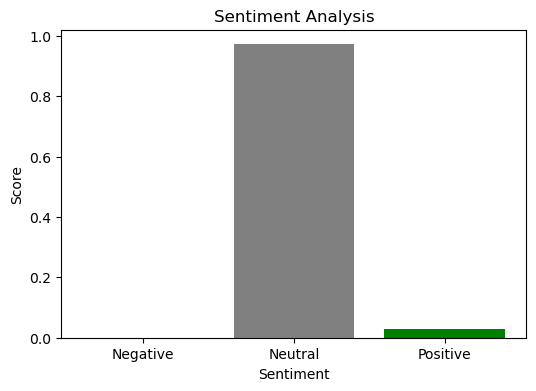

In [93]:

# Visualize sentiment polarity
plt.figure(figsize=(6, 4))
plt.bar(["Negative", "Neutral", "Positive"], [max(0, -polarity), max(0, 1-polarity), max(0, polarity)], color=['red', 'gray', 'green'])
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Score')
plt.show()

# Using SpaCy NER to show entities (NLP Topics)

In [87]:
# NLP using SpaCy (Named Entity Recognition)
nlp = spacy.load("en_core_web_sm")
doc = nlp(pdf_text)

# Named Entity Recognition (NER)
ner_entities = [(ent.text, ent.label_) for ent in doc.ents]

# Display the Named Entities
for entity, label in ner_entities:
    print(f"Entity: {entity}, Label: {label}")

Entity: HOUSE, Label: ORG
Entity: Helmer, Label: PERSON
Entity: two, Label: CARDINAL
Entity: china, Label: GPE
Entity: winter, Label: DATE
Entity: MAID, Label: ORG
Entity: NORA, Label: ORG
Entity: Helen, Label: PERSON
Entity: this
evening, Label: TIME
Entity: NORA, Label: ORG
Entity: one, Label: CARDINAL
Entity: two, Label: CARDINAL
Entity: HELMER, Label: ORG
Entity: NORA, Label: ORG
Entity: NORA, Label: ORG
Entity: NORA, Label: ORG
Entity: Torvald, Label: ORG
Entity: HELMER, Label: ORG
Entity: NORA, Label: ORG
Entity: Torvald, Label: PERSON
Entity: this year, Label: DATE
Entity: first, Label: ORDINAL
Entity: HELMER, Label: ORG
Entity: NORA, Label: ORG
Entity: Yes, Torvald, Label: ORG
Entity: HELMER, Label: ORG
Entity: the New Year, Label: EVENT
Entity: a whole quarter, Label: DATE
Entity: NORA, Label: ORG
Entity: HELMER, Label: ORG
Entity: Nora, Label: PERSON
Entity: fifty pounds, Label: QUANTITY
Entity: today, Label: DATE
Entity: the Christmas week, Label: DATE
Entity: New Year’s Eve

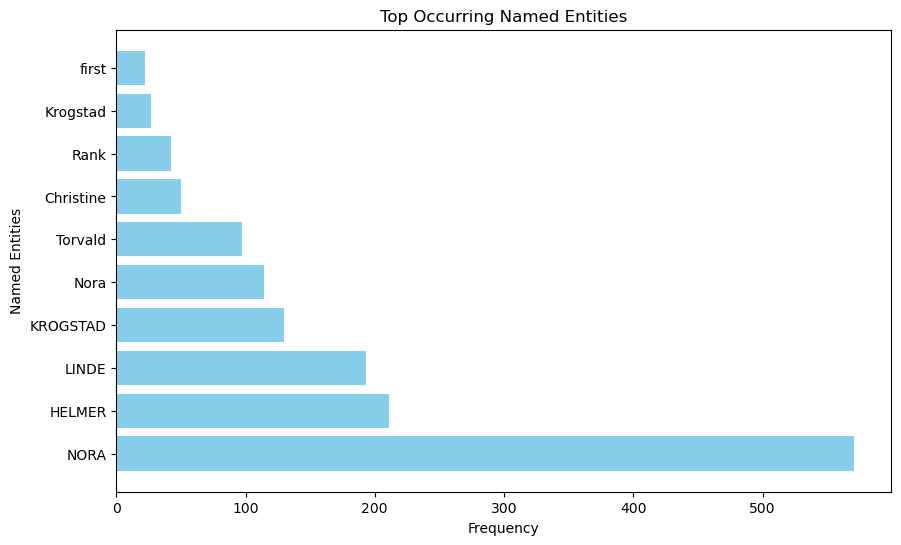

In [88]:
# Named Entity Recognition (NER)
ner_entities = [ent.text for ent in doc.ents]

# Count the occurrences of each entity
entity_counter = Counter(ner_entities)

# Get the top 10 occurring entities
top_entities = entity_counter.most_common(10)

# Extract entity names and frequencies for plotting
entity_names, frequencies = zip(*top_entities)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.barh(entity_names, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Named Entities')
plt.title('Top Occurring Named Entities')
plt.show()

# Tokenization and POS to map out the book and find the most occurences

Word: A, POS Tag: Determiner
Word: DOLL, POS Tag: Proper noun, singular
Word: ’, POS Tag: Proper noun, singular
Word: S, POS Tag: Proper noun, singular
Word: HOUSE, POS Tag: Proper noun, singular
Word: ACT, POS Tag: Proper noun, singular
Word: I, POS Tag: Personal pronoun
Word: [, POS Tag: Verb, non-3rd person singular present
Word: SCENE.—A, POS Tag: Adjective
Word: room, POS Tag: Noun, singular or mass


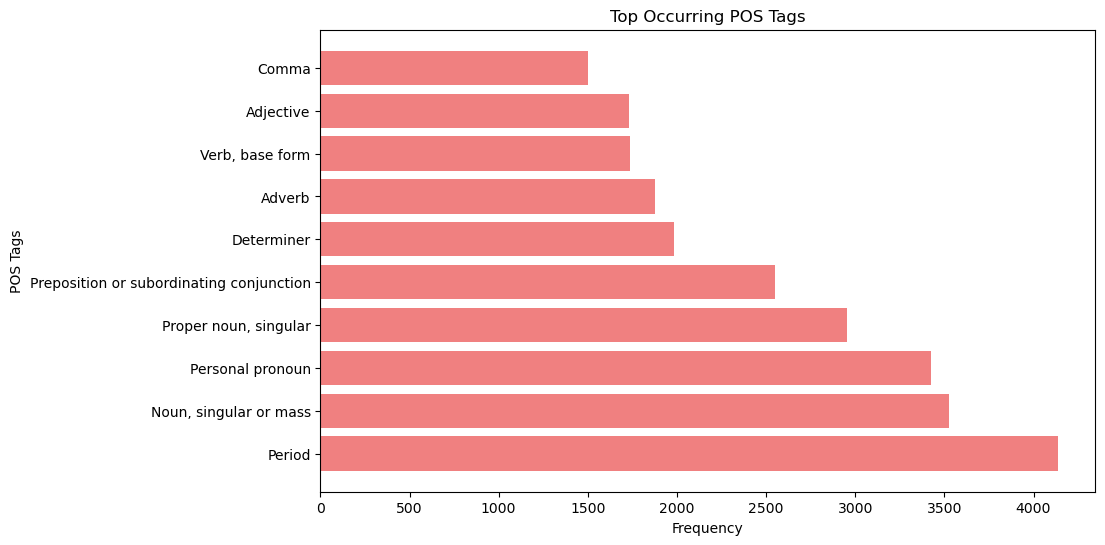

In [89]:
# Tokenization using NLTK
tokens = word_tokenize(pdf_text)

# Part-of-Speech (POS) tagging using NLTK with Penn Treebank POS tagset
pos_tags = pos_tag(tokens)

#bruh
pos_mapping = {
    'CC': 'Coordinating conjunction',
    'CD': 'Cardinal number',
    'DT': 'Determiner',
    'EX': 'Existential there',
    'FW': 'Foreign word',
    'IN': 'Preposition or subordinating conjunction',
    'JJ': 'Adjective',
    'JJR': 'Adjective, comparative',
    'JJS': 'Adjective, superlative',
    'LS': 'List item marker',
    'MD': 'Modal',
    'NN': 'Noun, singular or mass',
    'NNS': 'Noun, plural',
    'NNP': 'Proper noun, singular',
    'NNPS': 'Proper noun, plural',
    'PDT': 'Predeterminer',
    'POS': 'Possessive ending',
    'PRP': 'Personal pronoun',
    'PRP$': 'Possessive pronoun',
    'RB': 'Adverb',
    'RBR': 'Adverb, comparative',
    'RBS': 'Adverb, superlative',
    'RP': 'Particle',
    'SYM': 'Symbol',
    'TO': 'to',
    'UH': 'Interjection',
    'VB': 'Verb, base form',
    'VBD': 'Verb, past tense',
    'VBG': 'Verb, gerund or present participle',
    'VBN': 'Verb, past participle',
    'VBP': 'Verb, non-3rd person singular present',
    'VBZ': 'Verb, 3rd person singular present',
    'WDT': 'Wh-determiner',
    'WP': 'Wh-pronoun',
    'WP$': 'Possessive wh-pronoun',
    'WRB': 'Wh-adverb',
    '$': 'Dollar sign',
    '#': 'Number sign',
    "''": 'Closing quotation mark',
    '(': 'Opening parenthesis',
    ')': 'Closing parenthesis',
    ',': 'Comma',
    '.': 'Period',
    ':': 'Colon',
    '``': 'Opening quotation mark'
}

# Replace POS tags with their corresponding words
pos_tags_readable = [(word, pos_mapping[tag]) for word, tag in pos_tags]

# Display POS tags along with words
for word, tag in pos_tags_readable[:10]:  # Displaying the first 10 words as an example
    print(f"Word: {word}, POS Tag: {tag}")

# Count the occurrences of each POS tag
pos_counter = Counter(tag for word, tag in pos_tags_readable)

# Get the top 10 occurring POS tags
top_pos_tags = pos_counter.most_common(10)

# Extract POS tag names and frequencies for plotting
pos_names, frequencies = zip(*top_pos_tags)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.barh(pos_names, frequencies, color='lightcoral')
plt.xlabel('Frequency')
plt.ylabel('POS Tags')
plt.title('Top Occurring POS Tags')
plt.show()

# BOW and graph

Bag-of-Words (BOW) Representation:
   able  abroad  absently  absolute  absolutely  absorbed  absurd  absurdly  \
0    13       2         1         1          12         1       1         1   

   abyss  accept  ...  wrote  year  years  yes  yesterday  yet  young  \
0      1       1  ...      4    11      9  156          9    6      4   

   younger  youthful  zealously  
0        1         1          1  

[1 rows x 2203 columns]


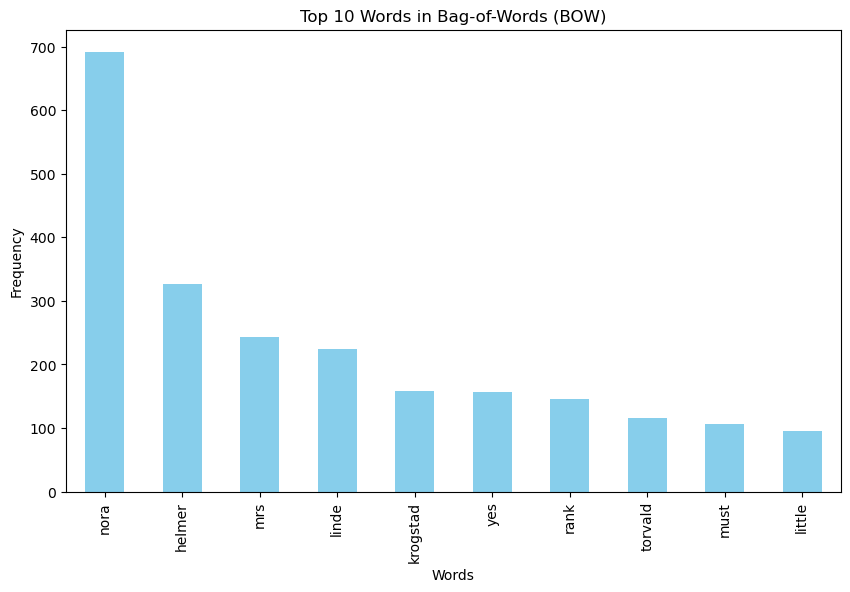

In [90]:
# Tokenization using NLTK
from nltk.tokenize import word_tokenize
tokens = word_tokenize(pdf_text)

# Remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

# Combine the words into a single string
text_for_bow = ' '.join(filtered_tokens)

# Create a Bag-of-Words representation using scikit-learn
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform([text_for_bow])

# Convert the BOW matrix to a DataFrame for better visualization
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the BOW DataFrame
print("Bag-of-Words (BOW) Representation:")
print(bow_df)

# Plot the most common words in the BOW representation
top_words = bow_df.sum().sort_values(ascending=False).head(10)
top_words.plot(kind='bar', figsize=(10, 6), color='skyblue', title='Top 10 Words in Bag-of-Words (BOW)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


# WordCloud using the Words

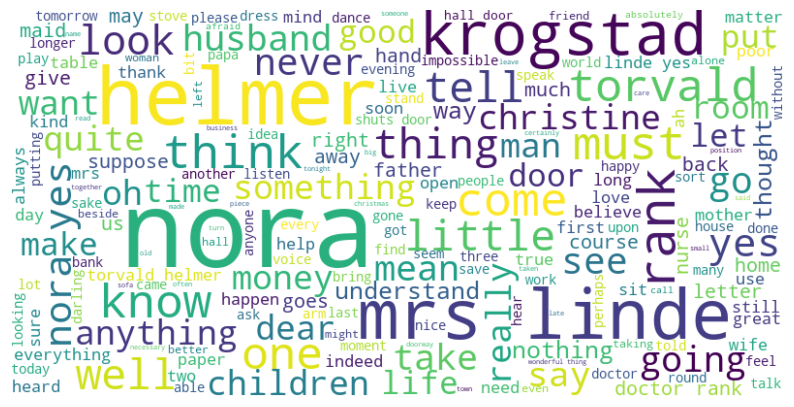

In [94]:


# Combine the words into a single string
text_for_wordcloud = ' '.join(filtered_tokens)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(text_for_wordcloud)

# Plot the WordCloud image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# NLP Application: Summarizing the text. I only summarized the first 100 sentences since the whole book will take too long to run

In [95]:

# Tokenize the sentences into words
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

# Create a TF-IDF matrix
vectorizer = TfidfVectorizer(max_features=500)  # Limit the number of features
tfidf_matrix = vectorizer.fit_transform([' '.join(sentence) for sentence in tokenized_sentences])

# Calculate the similarity matrix using dot product
similarity_matrix = tfidf_matrix * tfidf_matrix.T

# Create a graph manually
G = nx.Graph()
num_sentences = len(sentences)
for i in range(num_sentences):
    for j in range(i + 1, num_sentences):
        similarity_score = similarity_matrix[i, j]
        G.add_edge(i, j, weight=similarity_score)

# Calculate TextRank scores for each sentence
scores = nx.pagerank(G)

# Sort the sentences based on their scores
sorted_sentences = sorted(((scores[i], sentence) for i, sentence in enumerate(sentences)), reverse=True)

# Extract the top N sentences for the summary
top_n = 3  # Adjust as needed
summary_sentences = [sentence for _, sentence in sorted_sentences[:top_n]]

# Print the summary
print("\n".join(summary_sentences))

She leaves the outer door open after her, and through it is seen
a PORTER who is carrying a Christmas Tree and a basket, which he gives to the MAID who
has opened the door.]
Suppose, now, that I borrowed fifty pounds today, and you spent it all in the Christmas week,
and then on New Year’s Eve a slate fell on my head and killed me, and—
NORA.
In the right-hand
wall, at the farther end, another door; and on the same side, nearer the footlights, a stove,
two easy chairs and a rocking-chair; between the stove and the door, a small table.
